In [1]:
using Amoebas
import Plots

┌ Info: Recompiling stale cache file /Users/sascha/.julia/compiled/v1.1/Amoebas/kQIO2.ji for Amoebas [488af916-e379-514a-af83-fcb2141d2ac0]
└ @ Base loading.jl:1184


### Input
To construct polynomials we export the macro `@polyvar` from the package [DynamicPolynomials.jl](https://github.com/JuliaAlgebra/DynamicPolynomials.jl).

In [4]:
# Create variables
@polyvar x y z w
# construct a polynomial
f = x^2*y + y^2 + 3x^2*y^3 + y^4 + x^4*y^4

x⁴y⁴ + 3x²y³ + y⁴ + x²y + y²

### Output

We use the plotting capabilities provided by [Plots.jl](http://docs.juliaplots.org/latest/) to visualize the computed objects. This means that you just have to make `plot(myObject)` to visualize it. Note that the time to the first plot unfortunately takes some time, but afterwards everything is snappy

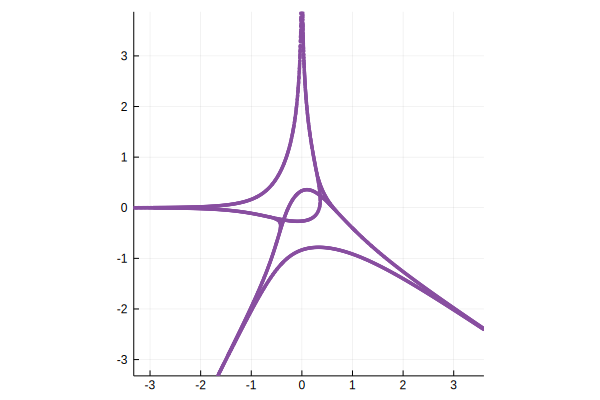

In [7]:
C = contour(f)
Plots.plot(C)

In a Jupyer Notebook we use `plot` automatically

In [8]:
C

Contour2D:
 * domain: (-3.321894866573836, 3.5965479387408634, -3.321894866573836, 3.8712010109078907)
 * number of points: 2273

## Amoeba + Spine

There are several algorithms implemented to compute amoebas. The most reliable algorithm is the `Greedy()` algorithm.

In [9]:
amoeba(f, alg=Greedy())

Bitmap2D of size 600×600

You probably notices that we did not provide a domain. We choose a domain automatically based on a heuristic but you are always free to choose one on your own.

In [10]:
f2 = 1 + z * cis(0.8π) + z^3*w*cis(1.6π) + z*w^2*cis(0.4π) + w*cis(1.2π)
grid = Grid2D(xlims=(-3, 2), ylims=(-2.5,3), res=(600, 700))
amoeba(f2, alg=Greedy(), grid=grid)

Bitmap2D of size 600×700

But the prettier one (and the default) is the `Polygonal()` algorithm.

In [11]:
A = amoeba(f)

PolygonalAmoeba:
 * accuracy: 0.009964786309360665

This algorithm first computes the spine of the amoeba. This can be shown with

In [16]:
spine(A)

Spine2D{DynamicPolynomials.Polynomial{true,Tropical{Float64}}} with:
 * 4 vertices
 * 4 half-rays
 * 1 bounded cells

As a convience metod we can also overlay the spine and the amoeba with `plot(A, spine=true)`. This is just a convience wrapper for `plot!(plot(A), plot(spine(A))`.

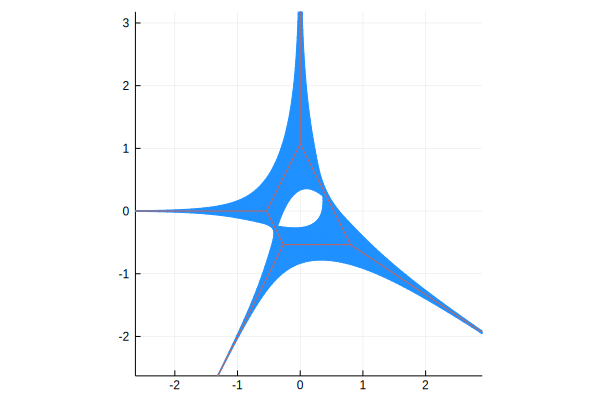

In [17]:
Plots.plot(A, spine=true)

Obviously the spine can also be computed standalone

In [18]:
spine(f)

Spine2D{DynamicPolynomials.Polynomial{true,Tropical{Float64}}} with:
 * 4 vertices
 * 4 half-rays
 * 1 bounded cells

Let's make things more difficult. Note that the `Polygonal()` algorithm is currently not multi-threaded.

In [ ]:
h = 2x^2 + 20x*y + 72x^2*y + 20x^3*y + 5y^2 + 160x*y^2 + 450x^2*y^2 + 160x^3*y^2 +
    5x^4*y^2 + 12y^3 + 300x*y^3 + 800x^2*y^3 + 300x^3*y^3 + 12x^4*y^3
# For more difficulat polynomials it can be necessary to modify the membership_options.
# The default is MembershipTestOptions(iterations=100, ntries=30, tol=1e-7) (which are still sufficient here)
A_h = amoeba(h, accuracy=0.1, membership_options=MembershipTestOptions(ntries=31))
Plots.plot(A_h, spine=true)

To verify that the algorithm did not miss any components of the complement we can take a peek at the rough approximation we used to compute the spine.

In [20]:
amoeba_approximation(spine(A_h))

UndefVarError: UndefVarError: A_h not defined

# Coamoeba

In [70]:
@polyvar z w

w

In [84]:
f_c = 1 + z * cis(0.8π) + z^3*w*cis(1.6π) + z*w^2*cis(0.4π) + w*cis(1.2π)

(0.30901699437494723 - 0.9510565162951536im)z^3w + (0.30901699437494745 + 0.9510565162951535im)zw^2 + (-0.8090169943749473 + 0.5877852522924732im)z + (-0.8090169943749475 - 0.587785252292473im)w + (1.0 + 0.0im)

We again have several algorithms to choose one, but the default one is `Greedy()`.

In [85]:
coamoeba(f_c, resolution=300) # you increase the resolution to improve the quality

Coamoeba of size 300×300

This algorithm uses a rough approximation of the coamoeba based on a result from Johansson. This can also be run as a separate algorithm

In [86]:
coamoeba(f_c, alg=Coarse())

Coamoeba of size 200×200

# Imaginary Projections

In [28]:
g = x^4 + im * x^3 - x^2 * y^2 + 3x^3 - 2im*x*y^2 + (4-2im)*x + 0.5*y^2 + 1.5

x^4 + -x^2y^2 + (3.0 + 1.0im)x^3 + (0.0 - 2.0im)xy^2 + (0.5 + 0.0im)y^2 + (4.0 - 2.0im)x + (1.5 + 0.0im)

For imaginary projections we always need to pass an grid since we do not have such a nice heursitic as in the amoeba case.

In [29]:
# The image quality improves substantially if we use a higher resolution 
grid = Grid2D(xlims=(-4, 4), ylims=(-5, 5), res=(1200, 1200))
imaginary_projection(g, grid=grid)

Bitmap2D of size 1200×1200

## 3D

We switch to the `plotlyjs` backend for 3D plotting. You can install this backend with `Pkg.add("Ploltyjs")`.
The current 3D Plotting is just a big 3D scatter plot and needs to be improved.

In [32]:
Plots.plotlyjs()

Plots.PlotlyJSBackend()

The `Polygonal()` algorithm is only available in the 2D case is, in 3D `Greddy()` is the default.

In [39]:
grid = Grid3D(xlims=(-3, 3), ylims=(-3, 3), zlims=(-3, 3), res=(31, 31, 31))
amoeba(x^2 + y^2 + z^2 + 1, grid=grid)

Bitmap2D of size 31×31×31

In [56]:
coamoeba(x^2+exp(im*0.23π)*y^2+z^2+2)

Coamoeba of size 21×21×21

In [57]:
imaginary_projection(x^2 + y^2 + z^2 + 1, grid=Grid3D(xlims=(-2, 2), ylims=(0, 2), zlims=(-2, 2), res=(21, 21, 21)))

Bitmap2D of size 21×21×21